In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.set_theme('notebook')

In [2]:


leatherback_vs_leatherback_res = np.load('/home/user/Documents/IsaacLab-HARL/results/adversarial_paper_results/trained_anymals_vs_untrained_leatherbacks/all_results.npz')

# leatherback_vs_leatherback_res = np.load('/home/user/Documents/IsaacLab-HARL/results/adversarial_paper_results/anymal_leatherback_vs_anymal_leatherback/all_results.npz')

In [3]:
list(leatherback_vs_leatherback_res.keys())

['episode_num',
 'num_steps',
 'team0_win_percentage',
 'team1_win_percentage',
 'Episode_Reward/team_0_push_out_reward',
 'Episode_Reward/team_1_push_out_reward']

In [4]:
leatherback_vs_leatherback_res["episode_num"]

array([   1,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])

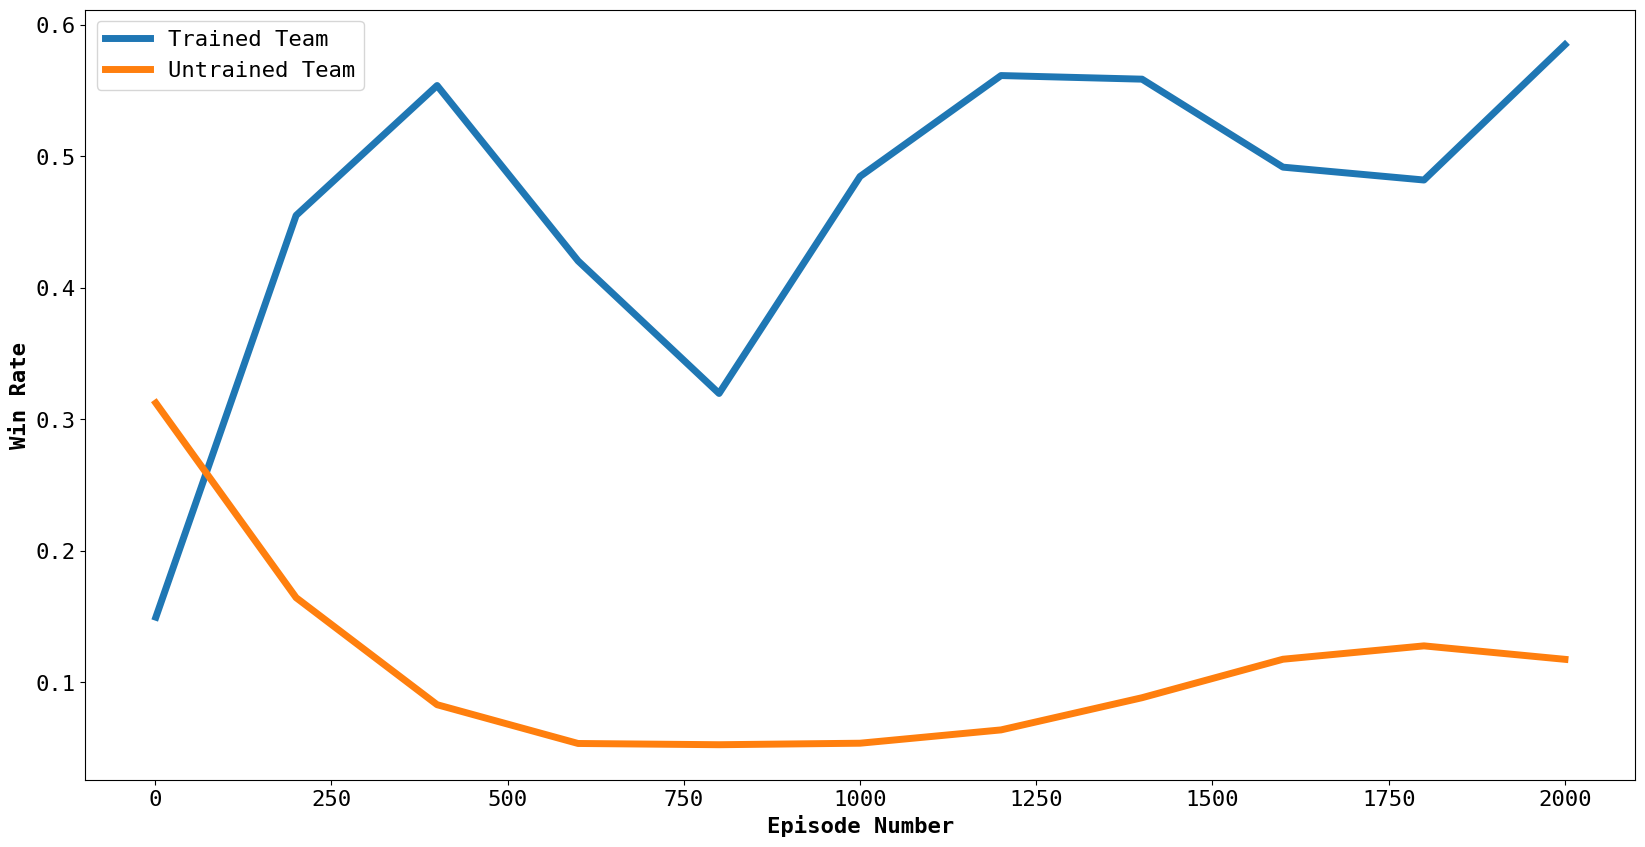

In [5]:
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(20,10))
plt.plot(leatherback_vs_leatherback_res['episode_num'][:], leatherback_vs_leatherback_res['team0_win_percentage'], lw=5,label='Trained Team')
plt.plot(leatherback_vs_leatherback_res['episode_num'][:], leatherback_vs_leatherback_res['team1_win_percentage'], lw=5,label='Untrained Team')
plt.xlabel('Episode Number', fontweight='bold', fontsize='16')
plt.ylabel('Win Rate', fontweight='bold', fontsize='16')
# plt.title("My Title", fontweight='bold', fontsize='20') 
plt.legend()
plt.show()

In [6]:
import pandas as pd

In [7]:
no_buffer = pd.read_csv('./buffer_results/happo_test_running_no_buffer.csv')
buffer_100 = pd.read_csv('./buffer_results/buffer_100.csv')

In [8]:
no_buffer.head()

,Wall time,Step,Value
0,1.757713e+09,800000,-14.616810
1,1.757713e+09,3200000,-136.870392
2,1.757713e+09,4000000,-171.666931
3,1.757713e+09,8800000,-137.530884
4,1.757713e+09,9600000,-128.882538


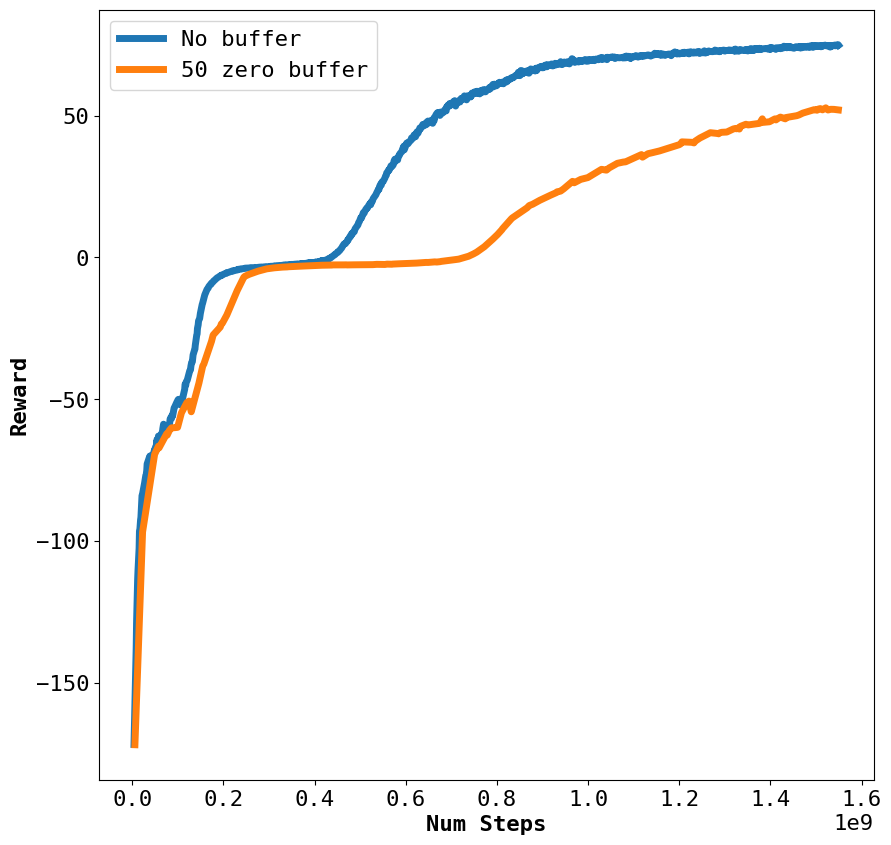

In [9]:
# plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,10))
max_x_val = len(no_buffer)
plt.plot(no_buffer['Step'][2:], no_buffer['Value'][2:], lw=5,label='No buffer')
plt.plot(buffer_100['Step'][:171], buffer_100['Value'][:171], lw=5,label='50 zero buffer')
# plt.yscale('log')
plt.xlabel('Num Steps', fontweight='bold', fontsize='16')
plt.ylabel('Reward', fontweight='bold', fontsize='16')
# plt.title("My Title", fontweight='bold', fontsize='20') 
plt.legend()
plt.show()

In [10]:
no_buffer['Value']

0      -14.616810
1     -136.870392
2     -171.666931
3     -137.530884
4     -128.882538
          ...    
995     74.840103
996     74.813568
997     74.622429
998     74.977631
999     74.805115
Name: Value, Length: 1000, dtype: float64

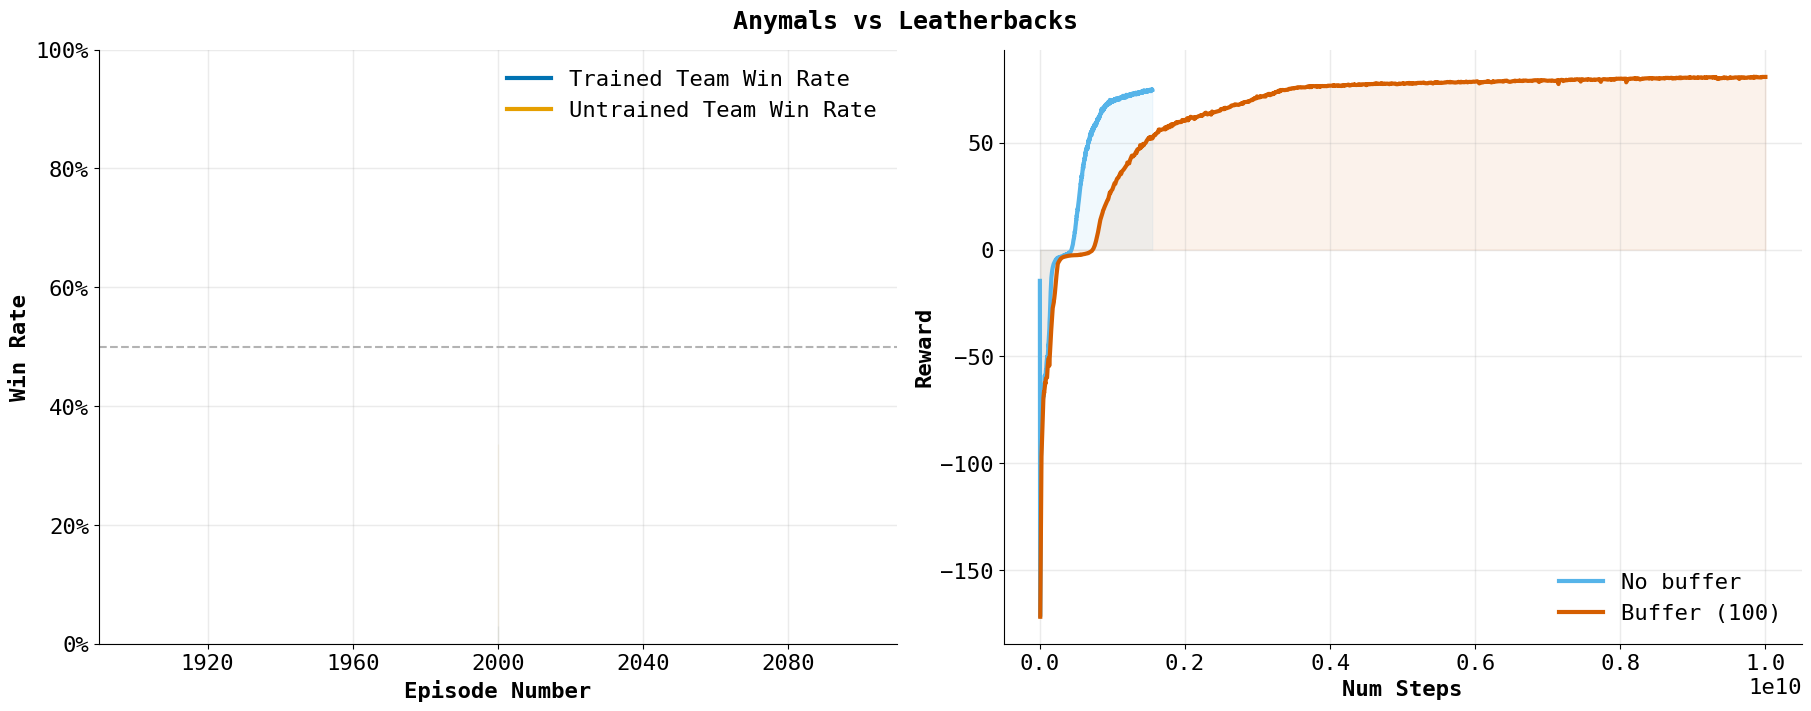

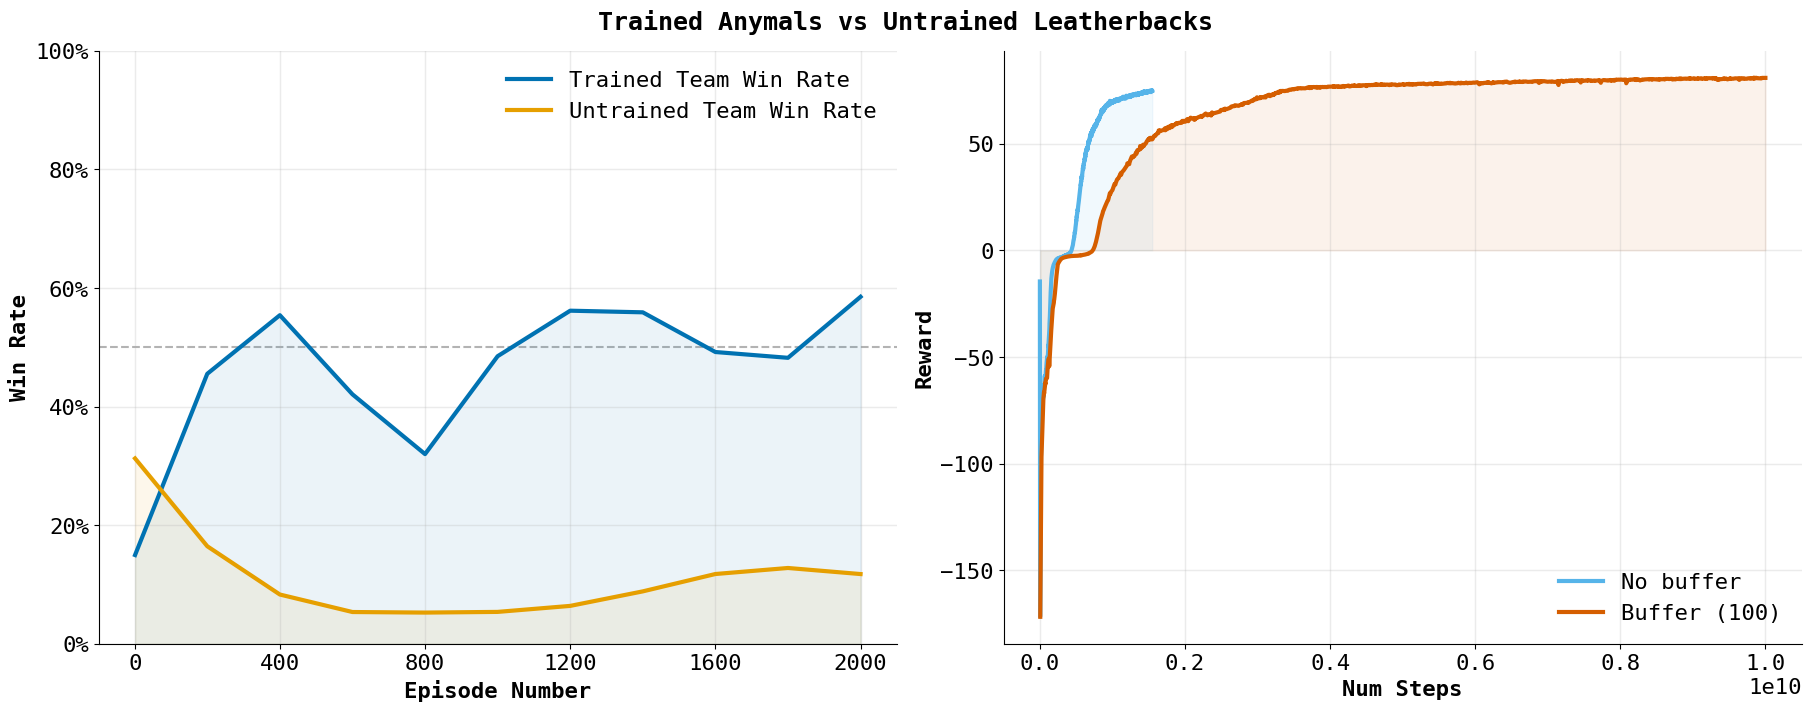

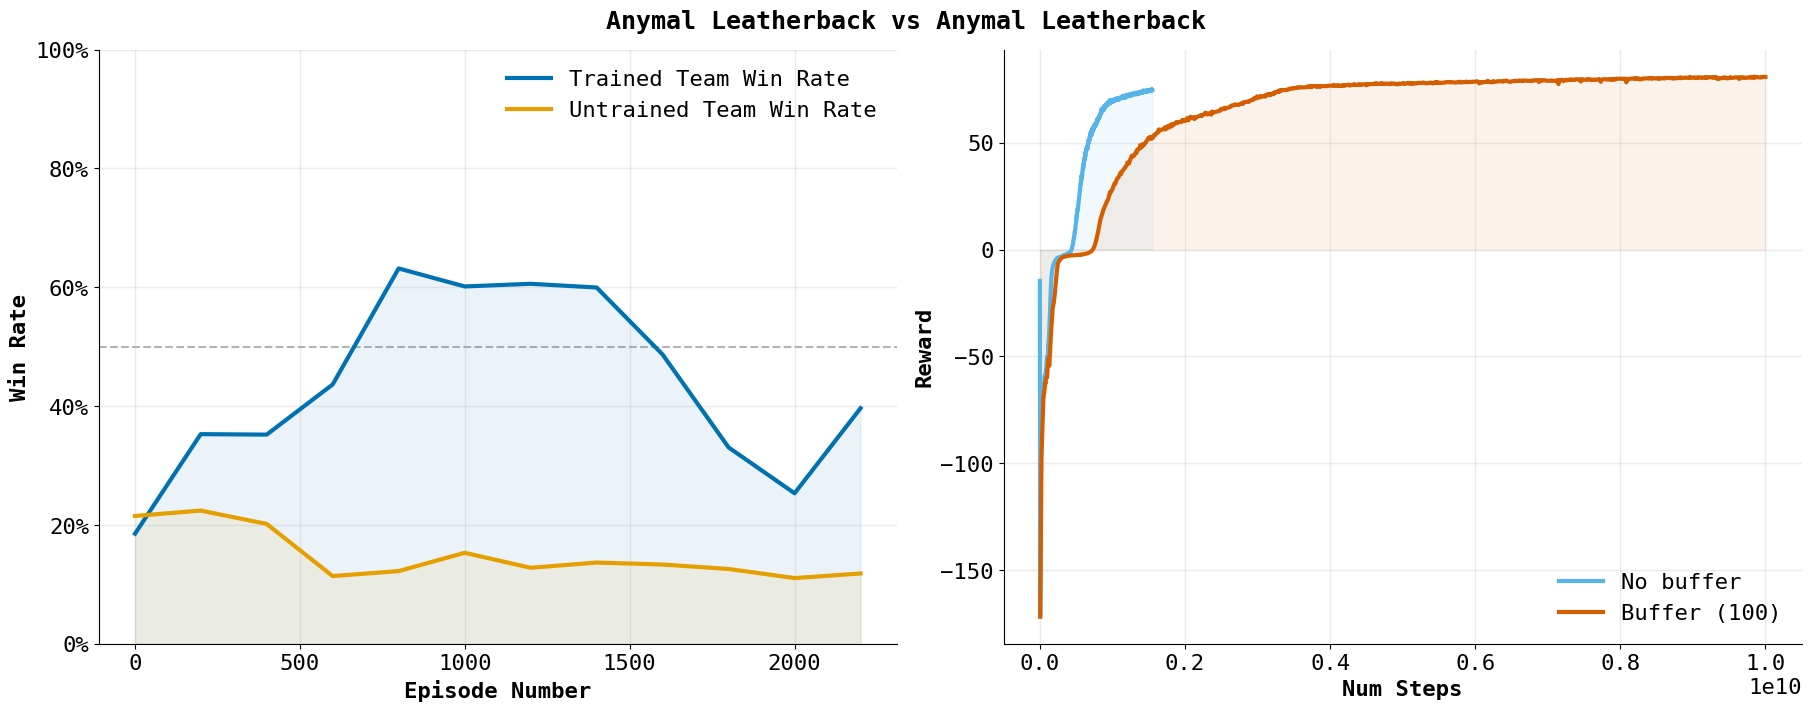

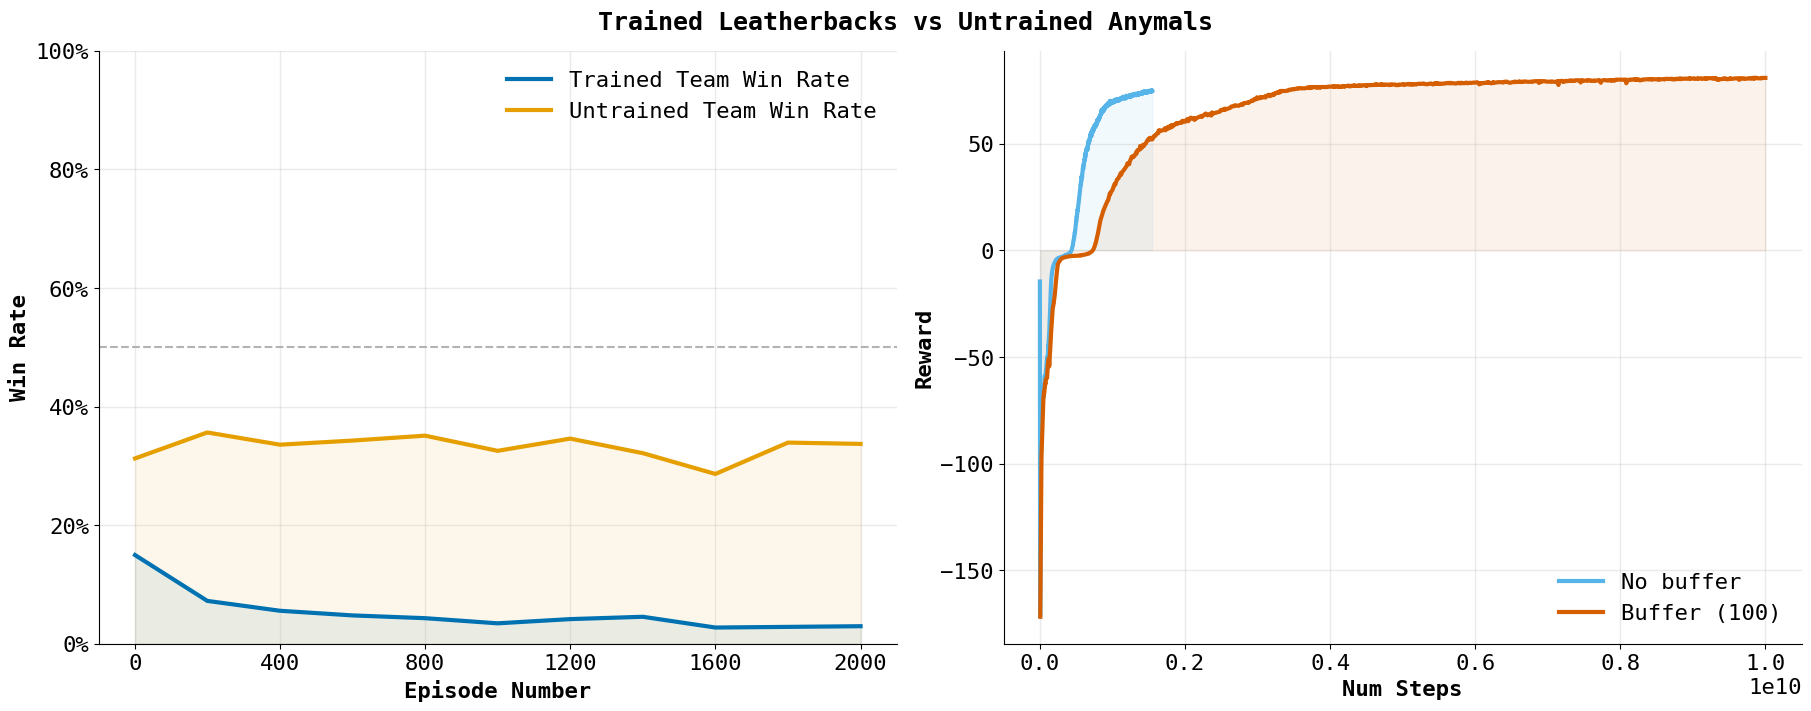

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, MaxNLocator

# Okabe–Ito colorblind-friendly palette
PALETTE = {
    "blue":   "#0072B2",
    "orange": "#E69F00",
    "green":  "#009E73",
    "sky":    "#56B4E9",
    "red":    "#D55E00",
    "pink":   "#CC79A7",
    "yellow": "#F0E442",
    "black":  "#000000",
}

def _beautify_axes(ax):
    ax.grid(True, alpha=0.25, linewidth=1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

def _maybe_percent_axis(ax, *series_list):
    # Decide whether to show 0–1 (fraction) or 0–100 (%)
    data = np.concatenate([np.asarray(s, dtype=float) for s in series_list if len(s) > 0])
    if data.size == 0 or not np.isfinite(data).any():
        return
    ymax = np.nanmax(data)
    if ymax <= 1.5:  # values like 0.0–1.0
        ax.set_ylim(0, 1.0)
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
        ax.axhline(0.5, color="0.7", linewidth=1.5, linestyle="--", zorder=0)
    elif ymax <= 100.0:  # values like 0–100
        ax.set_ylim(0, 100.0)
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=100.0))
        ax.axhline(50, color="0.7", linewidth=1.5, linestyle="--", zorder=0)
    # else: leave as-is (non-percentage scale)

def plot_win_rate_and_buffer_results(
    vs_data,
    no_buffer,
    buffer_100,
    fig=None,
    ax=None,
    title=None,
    buffer_labels=("No buffer", "Buffer (100)"),
):
    """
    vs_data: dict-like with keys 'episode_num', 'team0_win_percentage', 'team1_win_percentage'
    no_buffer, buffer_100: DataFrames or dict-like with keys 'Step', 'Value'
    """
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

    # --- Left: Win rates ---
    x = vs_data["episode_num"]
    y0 = vs_data["team0_win_percentage"]
    y1 = vs_data["team1_win_percentage"]

    ax[0].plot(x, y0, lw=3, label="Trained Team Win Rate", color=PALETTE["blue"])
    ax[0].plot(x, y1, lw=3, label="Untrained Team Win Rate", color=PALETTE["orange"])
    # subtle fill
    ax[0].fill_between(x, y0, step=None, alpha=0.08, color=PALETTE["blue"])
    ax[0].fill_between(x, y1, step=None, alpha=0.08, color=PALETTE["orange"])
    _maybe_percent_axis(ax[0], np.array(y0), np.array(y1))

    ax[0].set_xlabel("Episode Number", fontweight="bold")
    ax[0].set_ylabel("Win Rate", fontweight="bold")
    ax[0].legend(frameon=False, ncols=1)
    _beautify_axes(ax[0])

    # --- Right: Buffer results ---
    xb0, yb0 = no_buffer["Step"], no_buffer["Value"]
    xb1, yb1 = buffer_100["Step"], buffer_100["Value"]

    ax[1].plot(xb0, yb0, lw=3, label=buffer_labels[0], color=PALETTE["sky"])
    ax[1].plot(xb1, yb1, lw=3, label=buffer_labels[1], color=PALETTE["red"])
    ax[1].fill_between(xb0, yb0, alpha=0.08, color=PALETTE["sky"])
    ax[1].fill_between(xb1, yb1, alpha=0.08, color=PALETTE["red"])

    ax[1].set_xlabel("Num Steps", fontweight="bold")
    ax[1].set_ylabel("Reward", fontweight="bold")
    ax[1].legend(frameon=False, ncols=1)
    _beautify_axes(ax[1])

    if title:
        fig.suptitle(title, fontsize=18, fontweight="bold")

    return fig, ax

# ----------------
# Usage example
# ----------------
root_dir = '/home/user/Documents/IsaacLab-HARL'
result_files = [
    ('/results/adversarial_paper_results/anymals_vs_leatherbacks/all_results.npz', 'Anymals vs Leatherbacks'),
    ('/results/adversarial_paper_results/trained_anymals_vs_untrained_leatherbacks/all_results.npz', 'Trained Anymals vs Untrained Leatherbacks'),
    ('/results/adversarial_paper_results/anymal_leatherback_vs_anymal_leatherback/all_results.npz', 'Anymal Leatherback vs Anymal Leatherback'),
    ('/results/adversarial_paper_results/trained_leatherbacks_vs_untrained_anymals/all_results.npz', 'Trained Leatherbacks vs Untrained Anymals'),
]

# Create one figure per experiment (so curves don't pile up on top of each other)
for rel_path, exp_label in result_files:
    res = np.load(root_dir + rel_path, allow_pickle=True)
    # If your .npz stores arrays under specific keys, access them like:
    # vs_data = {
    #   "episode_num": res["episode_num"],
    #   "team0_win_percentage": res["team0_win_percentage"],
    #   "team1_win_percentage": res["team1_win_percentage"],
    # }
    # Otherwise, if `res` is already dict-like as in your original code:
    vs_data = res

    fig, ax = plot_win_rate_and_buffer_results(
        vs_data,
        no_buffer,
        buffer_100,
        title=exp_label,
        buffer_labels=("No buffer", "Buffer (100)"),  # adjust label to match your setup
    )
    plt.show()
